## Prelimanary Wrangling

This document explores a dataset containing riding information of 138,251 customers.
Ford GoBike System data (202005) from https://www.lyft.com/bikes/bay-wheels/system-data

In [99]:
import numpy as np
import os
import pandas as pd
import seaborn as sb
import datetime as dt

import matplotlib.pyplot as plt                                      
%matplotlib inline                


In [100]:
# Read csv file data
df_bike = pd.read_csv('202005-baywheels-tripdata.csv')

In [101]:
# high-level overview of data shape and composition
print(df_bike.shape)
print(df_bike.dtypes)
print(df_bike.head(5))

(138251, 14)
ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id      float64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
is_equity                bool
dtype: object
            ride_id  rideable_type           started_at             ended_at  \
0  BA4B4D93677877E8  electric_bike  2020-05-18 22:16:06  2020-05-18 22:28:20   
1  92634E825C7303CC  electric_bike  2020-05-19 16:57:35  2020-05-19 17:29:56   
2  1FCDD14C62521CC1  electric_bike  2020-05-18 20:08:14  2020-05-18 20:14:25   
3  3A5CEC684CA9FA18  electric_bike  2020-05-19 14:05:08  2020-05-19 14:14:16   
4  1FF95A9C2D1ED7F8  electric_bike  2020-05-10 17:45:54  2020-05-10 18:29:29   

            start_station_name  start_station_id       end_station_name 

Columns names

- ride_id : unique ride id
- rideable_type : rideable type
- started_at : starting time
- ended_at : end time
- start_station_name : start station name
- start_station_id : start station id
- end_station_name : end station name
- end_station_id : end station id
- start_lat : start city latitude
- start_lng : start city longitude
- end_lat : end city latitude
- end_lng : end city longitude
- memeber_casual : membership or casual
- is_equality : equality 

### What is the structure of your dataset?

There are 138,251 biking information in the dataset with 24 features. (ride_id, rideable_type, start/ending location and time, membership, equality)

### What is/are the main feature(s) of interest in your dataset?

I'm interested in finding whicy day/station customers start/end their biking, and also how membership, equality and rideable type affects these patterns.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that customers will start/end their biking during weekend. I also think that customers who have membership, equality and electic bike will be more likely to have more trips. 

## Univariate Exploration

I'll start by looking at data strcuture and sample values.

In [4]:
df_bike.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity
0,BA4B4D93677877E8,electric_bike,2020-05-18 22:16:06,2020-05-18 22:28:20,NaN,NaN,NaN,NaN,37.3443,-121.9218,37.3443,-121.9217,casual,False
1,92634E825C7303CC,electric_bike,2020-05-19 16:57:35,2020-05-19 17:29:56,NaN,NaN,NaN,NaN,37.7286,-122.4921,37.7154,-122.4854,casual,False
2,1FCDD14C62521CC1,electric_bike,2020-05-18 20:08:14,2020-05-18 20:14:25,NaN,NaN,Webster St at Clay St,492.0,37.7919,-122.4174,37.7906,-122.4325,casual,False


In [40]:
df_bike.ride_id.duplicated().sum()

0

In [48]:
df_bike.started_at.isna().sum()

0

In [ ]:
df_bike.start_lat.isna().sum()

In order to calculate duration in hours and days, I extractted strings from date time format and calculated duration hours.

In [102]:
# create datetime variable
df_bike["start_time"] = pd.to_datetime(df_bike.started_at)
df_bike["end_time"] = pd.to_datetime(df_bike.ended_at)
# extract day strings from start_time
df_bike['start_day'] = df_bike.start_time.dt.strftime("%A")

In [103]:
df_bike['diff_time'] = df_bike['end_time'] - df_bike['start_time']
df_bike['diff_days']=df_bike['diff_time']/np.timedelta64(1,'D')

In [105]:
df_bike['diff_hours'] = df_bike['diff_days']*24

In [106]:
# Extract date from start_time and end_time
df_bike['start_j_date'] = df_bike['start_time'].dt.date
df_bike['end_j_date'] = df_bike['end_time'].dt.date

In [114]:
df_bike['start_date1'] =  pd.to_datetime(df_bike['start_time'], format='%Y-%m-%d')
df_bike['day'] = df_bike['start_date1'].apply(lambda r:r.day).astype(int)
df_bike['month'] = df_bike['start_date1'].apply(lambda r:r.month).astype(int)
#bike_data.head(2)
df_bike.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_time,start_day,diff_time,diff_days,diff_hours,start_j_date,end_j_date,start_date1,day,month
0,BA4B4D93677877E8,electric_bike,2020-05-18 22:16:06,2020-05-18 22:28:20,NaN,NaN,NaN,NaN,37.3443,-121.9218,...,2020-05-18 22:28:20,Monday,00:12:14,0.008495,0,2020-05-18,2020-05-18,2020-05-18 22:16:06,18,5
1,92634E825C7303CC,electric_bike,2020-05-19 16:57:35,2020-05-19 17:29:56,NaN,NaN,NaN,NaN,37.7286,-122.4921,...,2020-05-19 17:29:56,Tuesday,00:32:21,0.022465,0,2020-05-19,2020-05-19,2020-05-19 16:57:35,19,5


In [115]:
# change dat type to int
df_bike['diff_hours'] = df_bike.diff_hours.astype(int)

In [117]:
df_bike.month.value_counts()

5    138251
Name: month, dtype: int64

In [118]:
df_bike.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_time,start_day,diff_time,diff_days,diff_hours,start_j_date,end_j_date,start_date1,day,month
0,BA4B4D93677877E8,electric_bike,2020-05-18 22:16:06,2020-05-18 22:28:20,NaN,NaN,NaN,NaN,37.3443,-121.9218,...,2020-05-18 22:28:20,Monday,00:12:14,0.008495,0,2020-05-18,2020-05-18,2020-05-18 22:16:06,18,5
1,92634E825C7303CC,electric_bike,2020-05-19 16:57:35,2020-05-19 17:29:56,NaN,NaN,NaN,NaN,37.7286,-122.4921,...,2020-05-19 17:29:56,Tuesday,00:32:21,0.022465,0,2020-05-19,2020-05-19,2020-05-19 16:57:35,19,5
2,1FCDD14C62521CC1,electric_bike,2020-05-18 20:08:14,2020-05-18 20:14:25,NaN,NaN,Webster St at Clay St,492.0,37.7919,-122.4174,...,2020-05-18 20:14:25,Monday,00:06:11,0.004294,0,2020-05-18,2020-05-18,2020-05-18 20:08:14,18,5
3,3A5CEC684CA9FA18,electric_bike,2020-05-19 14:05:08,2020-05-19 14:14:16,NaN,NaN,NaN,NaN,37.7557,-122.4165,...,2020-05-19 14:14:16,Tuesday,00:09:08,0.006343,0,2020-05-19,2020-05-19,2020-05-19 14:05:08,19,5
4,1FF95A9C2D1ED7F8,electric_bike,2020-05-10 17:45:54,2020-05-10 18:29:29,Pier 1/2 at The Embarcadero,12.0,NaN,NaN,37.7964,-122.3946,...,2020-05-10 18:29:29,Sunday,00:43:35,0.030266,0,2020-05-10,2020-05-10,2020-05-10 17:45:54,10,5


In [119]:
df_bike.diff_hours.value_counts()

0      128379
1        7918
2        1177
3         284
24        189
        ...  
191         1
67          1
69          1
199         1
35          1
Name: diff_hours, Length: 75, dtype: int64

Let's see the distribution of time duration of biking.

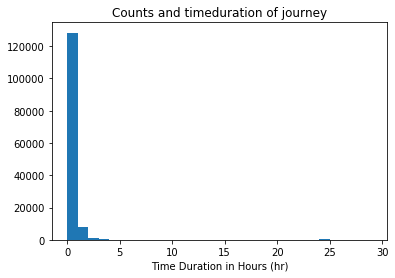

In [136]:
bins = np.arange(0, 30, 1)
plt.hist(data = df_bike, x = 'diff_hours', bins = bins)
plt.xlabel('Time Duration in Hours (hr)')
plt.title("Counts and timeduration of journey")
plt.show()

Large portion of rides was done in less than 4 hours, but some customers took a bike for more than 23 hours.

Let's see which day of the week customers usually ride a bike, and how rideable type, equaity and membership affects the pattern.

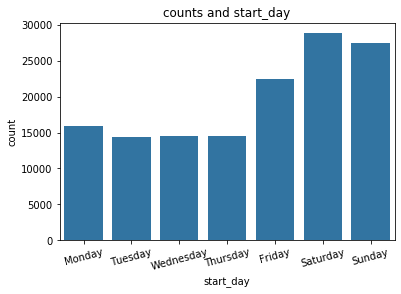

In [137]:
base_color = sb.color_palette()[0]
sb.countplot(data=df_bike, x='start_day',color=base_color, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("counts and start_day")
plt.xticks(rotation=15);

Customers took a ride more during weekends than weekdays. The most frequent start date is Saturday.

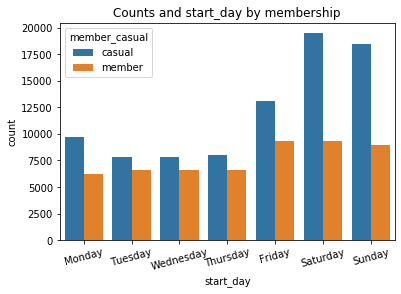

In [138]:
sb.countplot(data = df_bike, x='start_day', hue='member_casual',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Counts and start_day by membership")
plt.xticks(rotation=15);

The number of casual customers is larger than the number of membership cusomter, and this trend is similar on each start day.

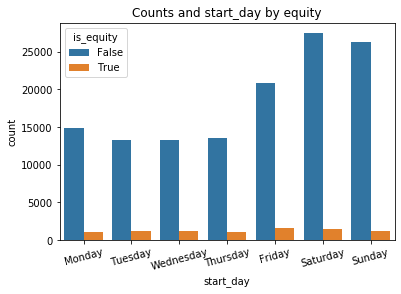

In [139]:
sb.countplot(data = df_bike, x='start_day', hue='is_equity', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Counts and start_day by equity")
plt.xticks(rotation=15);

Most of customers are without equity and equity pattern doesn't show big difference in each day.

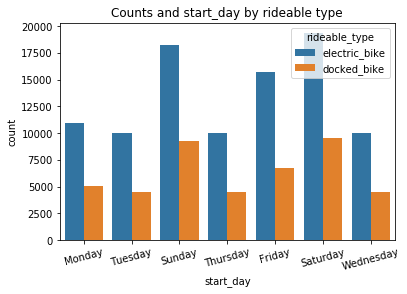

In [140]:
sb.countplot(data = df_bike, x='start_day', hue='rideable_type')
plt.title("Counts and start_day by rideable type")
plt.xticks(rotation=15);

The number of casual customers hving electric bike is larger than the number of customers with docked_bike, and this trend is similar on each start day.

Let's find which date of the month, and which week of the month customers rided the most.

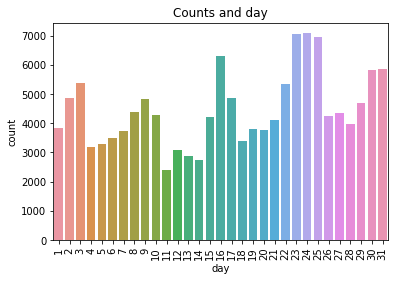

In [141]:
sb.countplot(data = df_bike, x='day')
plt.title("Counts and day")
plt.xticks(rotation=90);

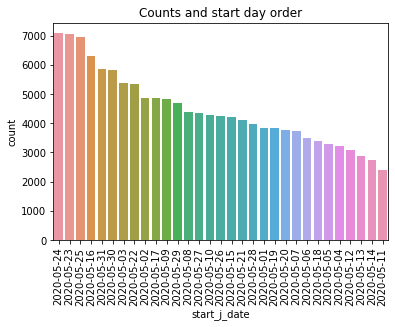

In [142]:
sb.countplot(data = df_bike, x='start_j_date', order=df_bike['start_j_date'].value_counts().index)
plt.title("Counts and start day order")
plt.xticks(rotation=90);

In [127]:
df_bike['start_wk'] = df_bike['start_time'].dt.week

In [128]:
df_bike.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,start_day,diff_time,diff_days,diff_hours,start_j_date,end_j_date,start_date1,day,month,start_wk
0,BA4B4D93677877E8,electric_bike,2020-05-18 22:16:06,2020-05-18 22:28:20,NaN,NaN,NaN,NaN,37.3443,-121.9218,...,Monday,00:12:14,0.008495,0,2020-05-18,2020-05-18,2020-05-18 22:16:06,18,5,21
1,92634E825C7303CC,electric_bike,2020-05-19 16:57:35,2020-05-19 17:29:56,NaN,NaN,NaN,NaN,37.7286,-122.4921,...,Tuesday,00:32:21,0.022465,0,2020-05-19,2020-05-19,2020-05-19 16:57:35,19,5,21
2,1FCDD14C62521CC1,electric_bike,2020-05-18 20:08:14,2020-05-18 20:14:25,NaN,NaN,Webster St at Clay St,492.0,37.7919,-122.4174,...,Monday,00:06:11,0.004294,0,2020-05-18,2020-05-18,2020-05-18 20:08:14,18,5,21


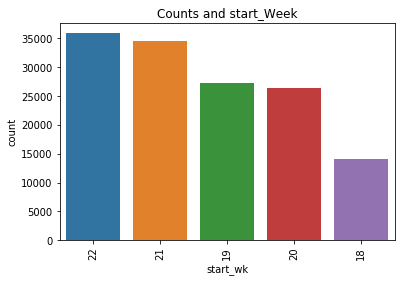

In [143]:
sb.countplot(data = df_bike, x='start_wk', order=df_bike['start_wk'].value_counts().index)
plt.title("Counts and start_Week")
plt.xticks(rotation=90);

Daily riding customer shows peoriodic pattern. On May, week 22 shows the most customers, and week 18 shows the lest customers.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

More people started bike journey during weekends than weekdays. Casual customers without membership had more bike journey than membership customers. There were more journies on the last week. I'd like to investigate more how membership customers and casual customers are different by comparing two group. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There are some observations without station infomration, but they all have latitude & longitude information. Therefore, I decided not to delete these observation and more focus on how overall customers' bike pattern is with rest of information. 

## Bivariate Exploration

In [125]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138251 entries, 0 to 138250
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   ride_id             138251 non-null  object         
 1   rideable_type       138251 non-null  object         
 2   started_at          138251 non-null  object         
 3   ended_at            138251 non-null  object         
 4   start_station_name  87315 non-null   object         
 5   start_station_id    87315 non-null   float64        
 6   end_station_name    84779 non-null   object         
 7   end_station_id      84779 non-null   float64        
 8   start_lat           138251 non-null  float64        
 9   start_lng           138251 non-null  float64        
 10  end_lat             138027 non-null  float64        
 11  end_lng             138027 non-null  float64        
 12  member_casual       138251 non-null  object         
 13  is_equity     

Let's see the relationship among day, duration hours and start/end location.

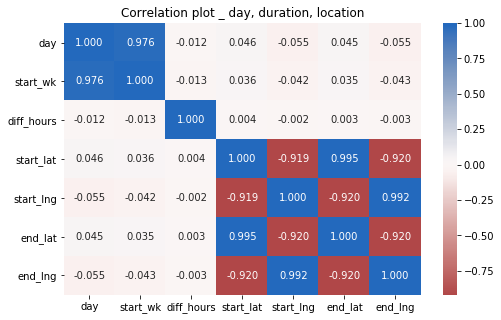

In [144]:
numeric_vars = ['day','start_wk','diff_hours','start_lat','start_lng','end_lat','end_lng']
plt.figure(figsize = [8, 5])
sb.heatmap(df_bike[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.title("Correlation plot _ day, duration, location")
plt.show()

Text(0.5, 1, 'correlation of random sample')

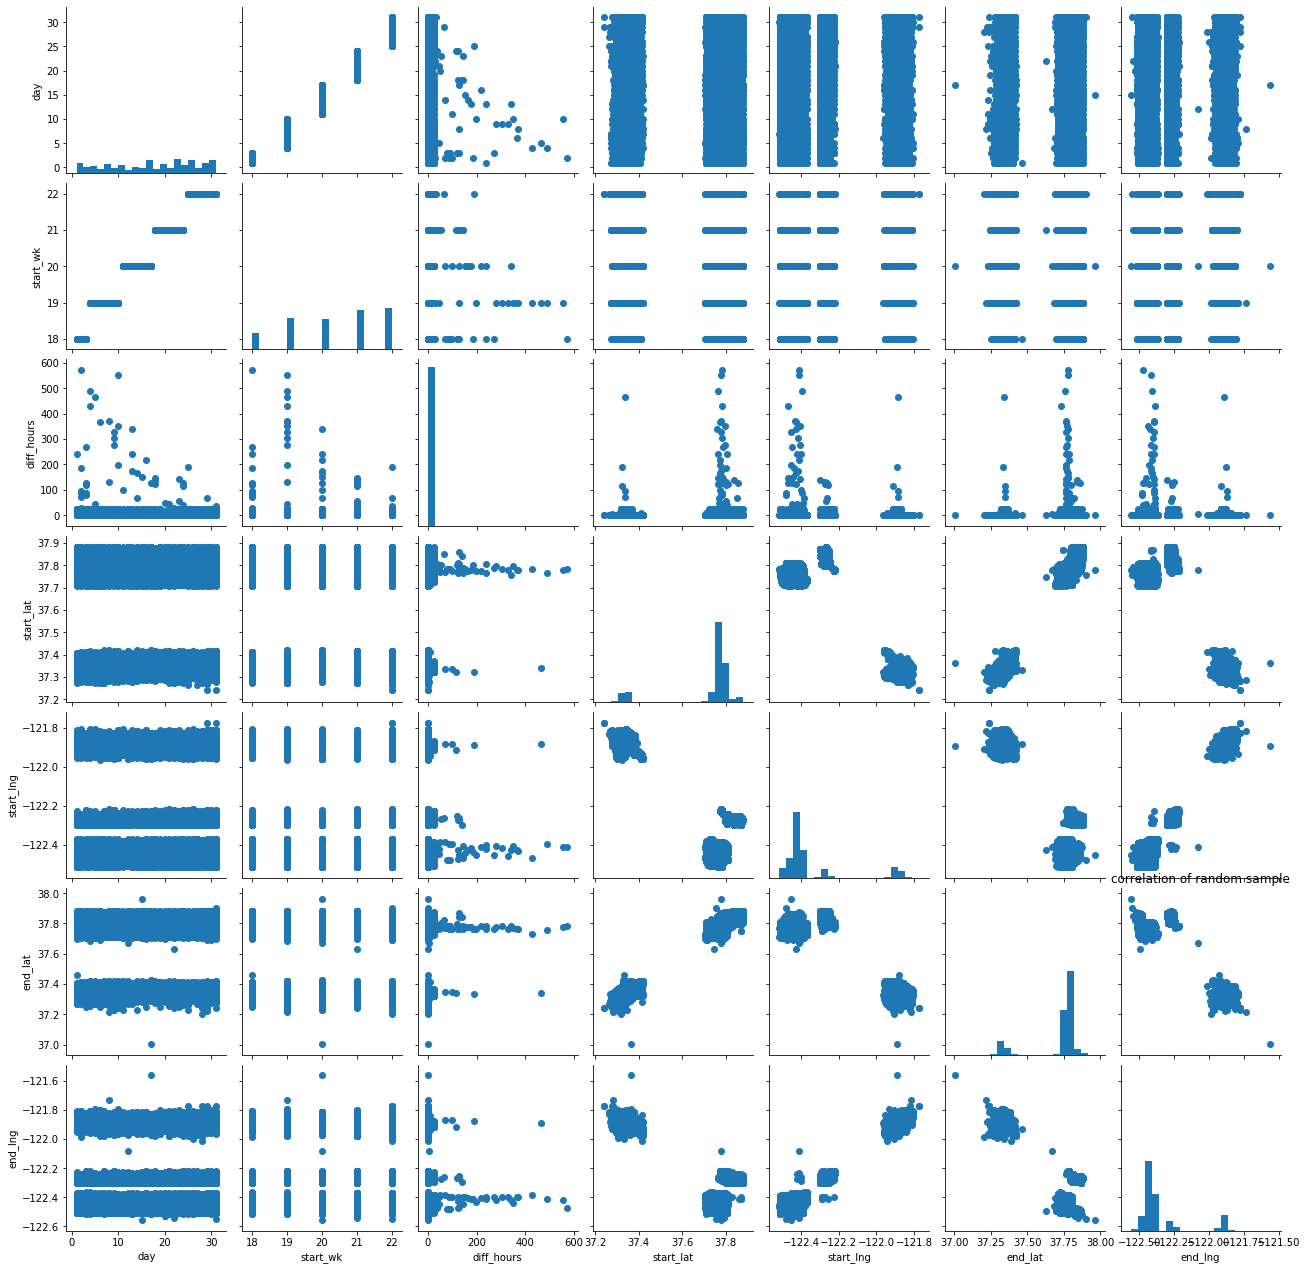

In [146]:
# plot matrix: sample 500 bikes so that plots are clearer and
# they render faster
samples = np.random.choice(df_bike.shape[0], 500, replace = False)
bike_samp = df_bike.loc[samples,:]

g = sb.PairGrid(data = df_bike, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)
plt.title("correlation of random sample")

There is no significant correltation bewteen day and duration hours. It means that bike journey time duration is not dependent on when they start the journey. Based upon the findings that start latitude/longitude and end latitude/longtidue have linear pattern with circle shape, we can assume that they're correlated. Meaningful values are how start latitude/longitude and end latitude/longitude has changed. This positive correlation means that there's no extremly long bike journey. 

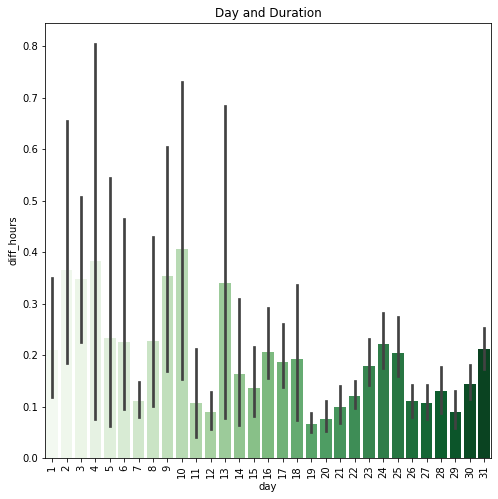

In [147]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 8])
sb.barplot(data = df_bike, x = 'day', y = 'diff_hours', palette = 'Greens')
plt.xticks(rotation=90)
plt.title("Day and Duration")
plt.show()

The plot of the full data using a bar plot shows that time duration of bike journey has peoriodic pattern, but decreasing over time. As time goes by, time duration varations had decreased.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
2nd graph shows us that variation of bike journey duration has reduced as time goes by. From univariate exploration, we figured out that more customers starated their journey in week 22 (last part of the month). Therefore, we can conclude that as time passed, more customers started to ride a bike but journey duration and varation has reduced.

## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the three categorical measures of quality play into the relationship between price and carat

In [89]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    #bins_x = np.arange(cuberoot_trans(.2), cuberoot_trans(3.5)+.05, .05)
    #bins_y = np.arange(2.4, 4.3+0.1, 0.1)
    plt.hist2d(x, y, cmap = palette, cmin = 0.5)
    #plt.xticks(cuberoot_trans(np.array(carat_ticks)), carat_ticks)
    #plt.yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])), [500, '1k', '2k', '5k', '10k', '20k'])

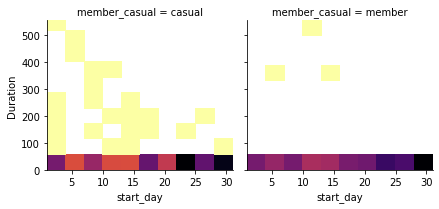

In [93]:
# create faceted heat maps on months of the year
g = sb.FacetGrid(data = df_bike, col = 'member_casual', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'day', 'diff_hours', color = 'inferno_r')
g.set_xlabels('start_day')
g.set_ylabels('Duration')

plt.show()

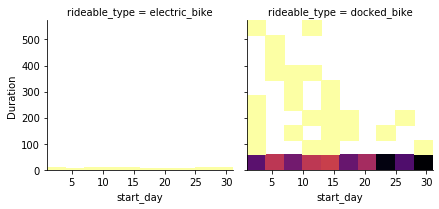

In [96]:
# create faceted heat maps on months of the year
g = sb.FacetGrid(data = df_bike, col = 'rideable_type', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'day', 'diff_hours', color = 'inferno_r')
g.set_xlabels('start_day')
g.set_ylabels('Duration')

plt.show()

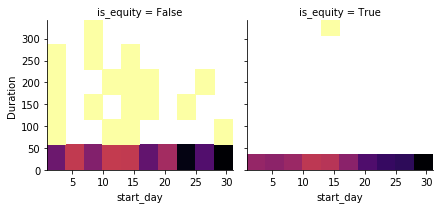

In [98]:
# create faceted heat maps on months of the year
g = sb.FacetGrid(data = df_bike, col = 'is_equity', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'day', 'diff_hours', color = 'inferno_r')
g.set_xlabels('start_day')
g.set_ylabels('Duration')

plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
I extended my investigation of bike journey duration against membership, bike type and equity. Most of customers were casual members, but membership customers are usually take a long trip. Almost of all ride was done with docked_bike. Large portion of customers are not equity customers, and their bike journey duration was various. 